In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [2]:
from scripts import Slopes
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [3]:
from keras.callbacks import Callback
class custom_callback(Callback):
    def __init__(self, logpath=""):
        self.logpath = logpath

    def on_epoch_end(self, epoch, logs=None):
        if(int(epoch) % 10) == 0:
            print("Epoch: {:>3} | Loss: ".format(epoch) + f"{logs['loss']:.5e}" + " | Valid loss: " + f"{logs['val_loss']:.5e}")

In [28]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=1, activation='linear'),
])
model.summary()
model.weights

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 10        
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense_6/kernel:0' shape=(1, 5) dtype=float32, numpy=
 array([[ 0.09742761,  0.24906969, -0.04981303,  0.05123544, -0.5110953 ]],
       dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[ 0.23044026,  0.03635651, -0.5536009 ,  0.5014696 ,  0.3603542 ],
        [ 0.49335957,  0.22400695, -0.33503774,  0.4636451 ,  0.17653579],
        [ 0.727054  ,  0.46030962,  0.39157736, -0.62993324,  0.25397134],
        [ 0.49452603,  0.14922059,  0.2456379 ,  0.05702072, -0.27345586],
        [-0.63845557, -0.700099  ,  0.05037856,  0.6510992 , -0.19929111]],
       dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_8/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[-0.9610121 ],
        [-0.12130141],
        [-0.9171655 ],
        [-0

In [7]:
X = np.linspace(-1, 1, 50)
y = X**2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True) 

In [ ]:
model.compile(
    #optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    optimizer=keras.optimizers.Adam(learning_rate=0.01, amsgrad=True, epsilon=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)
h = model.fit(X, y, batch_size=32, epochs=2000, verbose=0,
              validation_data=(X_valid, y_valid),
              callbacks=[custom_callback("tsau")])
# h = model.fit(X, y, batch_size=32, epochs=1500, verbose=0,
#               validation_data=(X_valid, y_valid),
#               callbacks=[custom_callback("tsau")])


In [31]:
# custom epsilon:
list((key, h.history[key][-1]) for key in h.history.keys())

[('loss', 0.006228300277143717),
 ('mean_squared_error', 0.006228300277143717),
 ('val_loss', 0.005604038946330547),
 ('val_mean_squared_error', 0.005604038946330547)]

In [26]:
# 2000 iterit
list((key, h.history[key][-1].format(.5e)) for key in h.history.keys())

[('loss', 0.0001302665041293949),
 ('mean_squared_error', 0.0001302665041293949),
 ('val_loss', 9.717539069242775e-05),
 ('val_mean_squared_error', 9.717539069242775e-05)]

In [23]:
# 500+1500 iterit
list((key, h.history[key][-1]) for key in h.history.keys())

[('loss', 0.0005161181907169521),
 ('mean_squared_error', 0.0005161181907169521),
 ('val_loss', 0.00021461895084939897),
 ('val_mean_squared_error', 0.00021461895084939897)]

In [4]:
def joonista(m, X, y, max_delta=0.0001):
    X_pred = np.linspace(-1.2, 1.2, 1000)
    X_vahemik= np.linspace(-1, 1, 1000)

    bpoints = Slopes.slope_checker(m, X_vahemik, max_delta)
    print(f"model contains {len(bpoints)} breaks")

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
    ax1.scatter(X, y, marker="+", color='red', label="target")
    ax1.plot(X_pred, m.predict(X_pred), label="prediction",  linewidth=0.5)
    ax1.scatter(*zip(*bpoints), marker="x", color='magenta', label="breaks")
    ax1.legend()
    ax2.scatter(X, y, marker="+", color='red', label="target")
    plt.show()

model contains 130 breaks
32/32 [==============================] - 0s 3ms/step


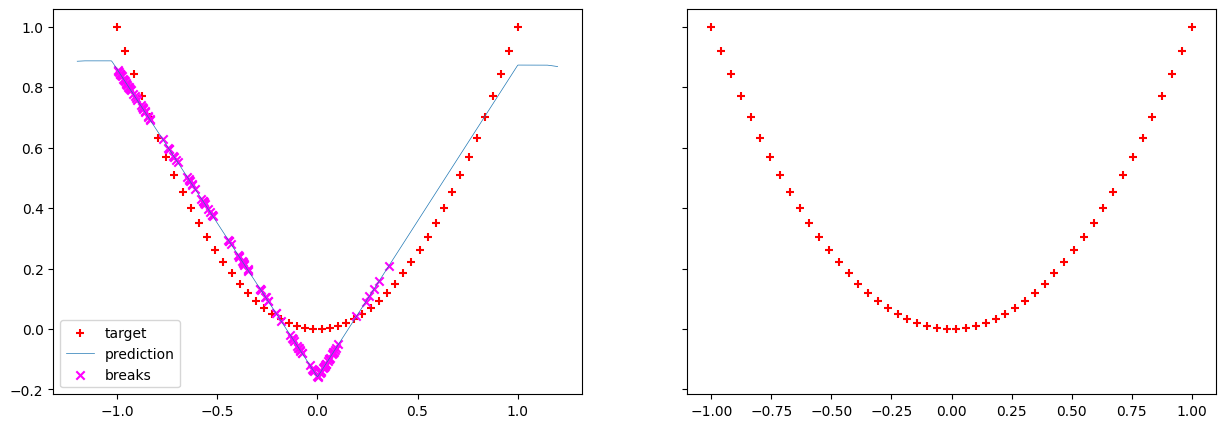

In [35]:
joonista(model, X, y)

## Gridsearch

In [5]:
from scikeras.wrappers import KerasRegressor

In [21]:
def create_model():
    return keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=5, activation='relu'),
        layers.Dense(units=5, activation='relu'),
        layers.Dense(units=1, activation='linear'),
    ])

tf.random.set_seed(0)
np.random.seed(0)


X = np.linspace(-1, 1, 50)
y = X**2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True)

batch_size = [8, 16, 32]
learn_rate = [0.0001, 0.001, 0.01, 0.1]
epsilon = [1, 0.1, 0.01, 0.0001, 0.00001]  # see Adami epsilon 
amsgard = [True, False]

param_grid = dict(batch_size=batch_size, 
    optimizer__learning_rate=learn_rate,
    optimizer__amsgrad=amsgard,
    optimizer__epsilon=epsilon)

model = KerasRegressor(model=create_model, loss=keras.losses.MeanSquaredError(), optimizer="Adam", epochs=4000, verbose=0)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=3, scoring='neg_mean_squared_error')

grid_result = grid.fit(X_train.reshape(-1, 1), y_train)

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\env\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [22]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)),

-0.093512 (0.022901) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 1, 'optimizer__learning_rate': 0.0001}
-0.011143 (0.009009) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 1, 'optimizer__learning_rate': 0.001}
-0.026982 (0.035845) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 1, 'optimizer__learning_rate': 0.01}
-0.024558 (0.033911) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 1, 'optimizer__learning_rate': 0.1}
-0.010292 (0.005966) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 0.1, 'optimizer__learning_rate': 0.0001}
-0.033544 (0.044357) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 0.1, 'optimizer__learning_rate': 0.001}
-0.054610 (0.040552) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 0.1, 'optimizer__learning_rate': 0.01}
-0.000592 (0.000497) with: {'batch_size': 8, 'optimizer__amsgrad'

In [23]:
# kui kasutada default score ehk vist acc
# väärtused olid
# grid.best_params_
_ = ''' {'batch_size': 8,
 'optimizer__amsgrad': False,
 'optimizer__epsilon': 0.001,
 'optimizer__learning_rate': 0.1}
 '''
grid.best_params_

{'batch_size': 8,
 'optimizer__amsgrad': True,
 'optimizer__epsilon': 0.01,
 'optimizer__learning_rate': 0.01}

In [24]:
tf.random.set_seed(0)

model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=5, activation='relu'),
        layers.Dense(units=5, activation='relu'),
        layers.Dense(units=1, activation='linear'),
    ])

X = np.linspace(-1, 1, 50)
y = X**2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01, amsgrad=True, epsilon=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=4000, verbose=0,
              validation_data=(X_valid, y_valid),
              callbacks=[custom_callback("tsau")])

Epoch:   0 | Loss: 1.50093e-01 | Valid loss: 8.98707e-02
Epoch:  10 | Loss: 4.94074e-02 | Valid loss: 4.15427e-02
Epoch:  20 | Loss: 1.29805e-02 | Valid loss: 9.98642e-03
Epoch:  30 | Loss: 2.73529e-03 | Valid loss: 2.31655e-03
Epoch:  40 | Loss: 1.50084e-03 | Valid loss: 8.92099e-04
Epoch:  50 | Loss: 7.79674e-04 | Valid loss: 5.31880e-04
Epoch:  60 | Loss: 6.14048e-04 | Valid loss: 4.79714e-04
Epoch:  70 | Loss: 4.77611e-04 | Valid loss: 2.93521e-04
Epoch:  80 | Loss: 3.98609e-04 | Valid loss: 2.27075e-04
Epoch:  90 | Loss: 3.48592e-04 | Valid loss: 2.39318e-04
Epoch: 100 | Loss: 3.32948e-04 | Valid loss: 2.16182e-04
Epoch: 110 | Loss: 3.38243e-04 | Valid loss: 1.84975e-04
Epoch: 120 | Loss: 2.96801e-04 | Valid loss: 1.76870e-04
Epoch: 130 | Loss: 3.45965e-04 | Valid loss: 2.04051e-04
Epoch: 140 | Loss: 2.95238e-04 | Valid loss: 1.96942e-04
Epoch: 150 | Loss: 2.87949e-04 | Valid loss: 2.01778e-04
Epoch: 160 | Loss: 3.80916e-04 | Valid loss: 1.86910e-04
Epoch: 170 | Loss: 2.55797e-04 

model contains 77 breaks
32/32 [==============================] - 0s 1ms/step


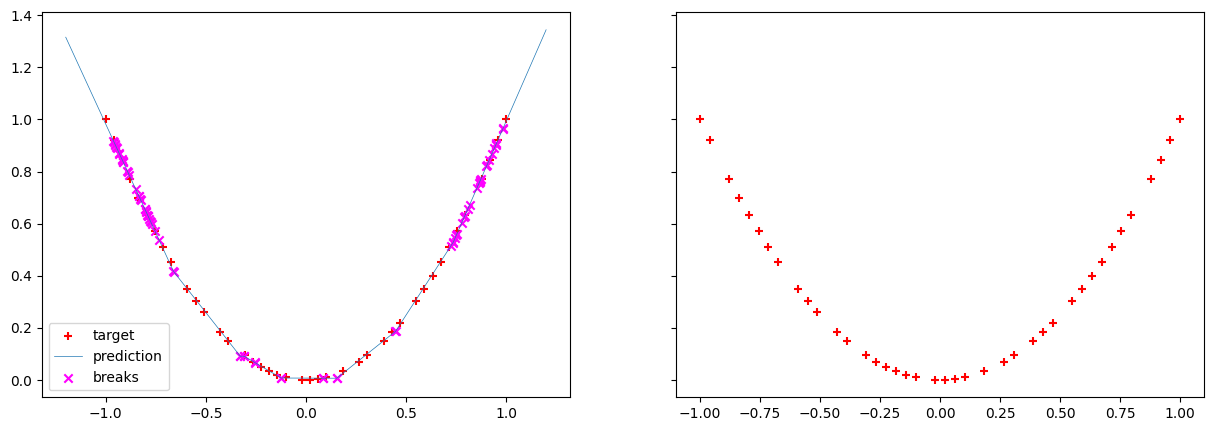

In [26]:
joonista(model, X_train, y_train)